In [1]:
# conda install -c conda-forge prophet
# pip install holidays==0.24
# pip install plotly

### Importand links for Prophet:
1. Documentation: https://facebook.github.io/prophet/docs/quick_start.html
2. Prophet paper: https://www.tandfonline.com/doi/full/10.1080/00031305.2017.1380080

### Introduction to Prophet

- Prophet is a robust tool developed by __Facebook__ for producing high-quality forecasts for time series data, especially those with strong seasonal effects and multiple seasonality. Prophet is particularly suited for data with:
   - Strong seasonal patterns (e.g., daily, weekly, yearly).
   - Trend changes over time.
   - Missing values and outliers.
 - __<u>Key Features of Prophet:</u>__
   - __Automatic Detection of Seasonality:__ Prophet automatically detects and models yearly, weekly, and daily seasonality.
   - __Incorporates Holiday Effects:__ It can include effects of holidays and other significant events, which are important for accurate forecasts.
   - __Robust to Missing Data:__ Prophet handles missing data gracefully without requiring imputation.
   - __Scalable:__ It works well with large datasets and can produce forecasts quickly.
   - __User-Friendly:__ It provides an easy-to-use interface for non-experts, while still being flexible enough for experts to fine-tune.

### Components of Prophet
- Prophet decomposes the time series into three main components plus an error term:

<div align="center">
$y(t) = g(t) + s(t) + h(t) + \epsilon_t$
</div>

- **Trend ($g(t)$)**: The trend component models the long-term increase or decrease in the time series.
- **Seasonality ($s(t)$)**: This captures the periodic fluctuations in the data.
- **Holidays ($h(t)$)**: This models the effects of holidays or special events.
- **Error Term ($\epsilon_t$)**: This represents the residual noise in the data.

### 1. Trend Component

The trend component $g(t)$ is the non-periodic component of the time series. Prophet provides two options to model the trend:

**1.1. Piecewise Linear Trend**: This models the trend as a series of linear segments. The model allows the trend to change at specified points in time called "<u>changepoints</u>".

<div align="center">
\[ g(t) = (k + a(t)\delta)t + (m + a(t)\gamma) \]
</div>

Where:
- $k$: is the growth rate.
- $\delta$: is the rate adjustment at changepoints.
- $m$: is the offset.
- $\gamma$: is the offset adjustment at changepoints.
- $a(t)$: is an indicator function for changepoints.

**1.2. Logistic Growth Trend**: This models the trend as a logistic growth curve, useful for data that saturates over time.

<div align="center">
\[ g(t) = \frac{C}{1 + \exp(-k (t - t_0))} \]
</div>

Where:
- $C$: is the carrying capacity.
- $k$: is the growth rate.
- $t_0$: is the midpoint of the growth period.

### 2. Seasonal Component

The seasonal component $s(t)$ models repeating patterns in the data. Prophet uses Fourier series to model seasonality:

<div align="center">
\[ s(t) = \sum_{n=1}^{N} \left( a_n \cos\left(\frac{2 \pi n t}{P}\right) + b_n \sin\left(\frac{2 \pi n t}{P}\right) \right) \]
</div>

Where:
- $P$: is the period of the seasonality (e.g., 365.25 for yearly seasonality).
- $a_n$ and $b_n$: are coefficients estimated from the data.

### 3. Holiday Component

The holiday component $h(t)$ captures the effects of holidays or events that cause predictable deviations from the trend and seasonality:

<div align="center">
\[ h(t) = \sum_{j=1}^{M} \kappa_j D_j(t) \]
</div>

Where:
- $\kappa_j$: is the effect of the holiday $j$.
- $D_j(t)$: is an indicator function that is 1 when the date $t$ is within the holiday window and 0 otherwise.

### 4. Error Term

The error term $\epsilon_t$ represents the noise in the data that isn't captured by the model components. Prophet assumes this noise follows a normal distribution with mean zero and constant variance.

### Quick Start: Python API
- __Model:__
   - Follows the sklearn model API.
   - Create an instance of the Prophet class.
   - Use the fit and predict methods.
- __Input Requirements:__
   - Dataframe with two columns: __ds__ (datestamp) and __y__ (numeric measurement).
   - __ds:__ Date format (YYYY-MM-DD) or timestamp format (YYYY-MM-DD HH:MM).
   - __y:__ Numeric values representing the measurement to forecast.
- __Example:__
   - Time series of log daily page views for the Wikipedia page of __Peyton Manning__.

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
from prophet.plot import plot_plotly, add_changepoints_to_plot, plot_components_plotly, plot_forecast_component, plot_yearly
from IPython.display import Image 
import matplotlib.pyplot as plt

C:\Anacon\envs\tf_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anacon\envs\tf_env\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Anacon\envs\tf_env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Anacon\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# Load the time series data
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

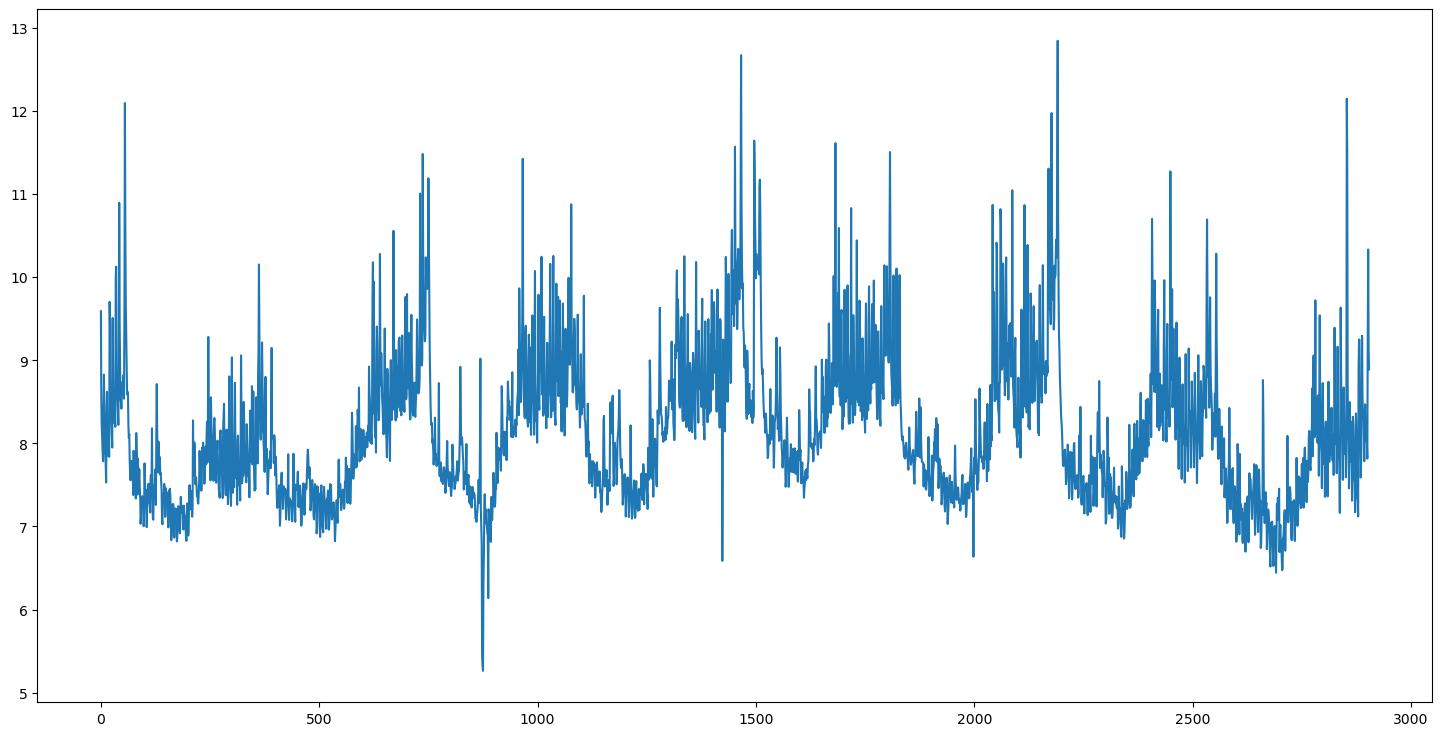

In [25]:
df.plot(figsize=(18, 9));
plt.legend().set_visible(False);

In [12]:
df.describe()

y
count  2905.000000
mean      8.138958
std       0.845957
min       5.262690
25%       7.514800
50%       7.997999
75%       8.580168
max      12.846747

In [4]:
# Instantiate Prophet: create a new Prophet object.
m = Prophet()

In [5]:
# Fit the model
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
# Making predictions
# periods: specifies the number of days into the future.
future = m.make_future_dataframe(periods=365)

In [10]:
# Inspect Future Dataframe
future

ds
0    2007-12-10
1    2007-12-11
2    2007-12-12
3    2007-12-13
4    2007-12-14
...         ...
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

[3270 rows x 1 columns]

- __Predict Future Values:__
   - Use the predict method.
   - The method assigns predicted values (yhat) to each row in the future DataFrame.

In [8]:
forecast = m.predict(future)

In [9]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2007-12-10  8.039346    8.198506    9.459556     8.039346     8.039346   
1    2007-12-11  8.037802    7.965223    9.212079     8.037802     8.037802   
2    2007-12-12  8.036259    7.778216    9.031261     8.036259     8.036259   
3    2007-12-13  8.034715    7.740295    8.957137     8.034715     8.034715   
4    2007-12-14  8.033172    7.694170    8.978447     8.033172     8.033172   
...         ...       ...         ...         ...          ...          ...   
3265 2017-01-15  7.195628    7.489149    8.922009     6.851768     7.539699   
3266 2017-01-16  7.194612    7.773922    9.276536     6.848837     7.539504   
3267 2017-01-17  7.193596    7.581326    9.038514     6.846723     7.539310   
3268 2017-01-18  7.192580    7.386989    8.822004     6.844736     7.539301   
3269 2017-01-19  7.191564    7.454371    8.881990     6.843483     7.539553   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           0.803277              0.803277              0.803277  0.352299   
1           0.553349              0.553349              0.553349  0.119636   
2           0.350724              0.350724              0.350724 -0.066658   
3           0.330166              0.330166              0.330166 -0.072265   
4           0.319694              0.319694              0.319694 -0.069568   
...              ...                   ...                   ...       ...   
3265        1.018350              1.018350              1.018350  0.048272   
3266        1.344439              1.344439              1.344439  0.352299   
3267        1.132894              1.132894              1.132894  0.119636   
3268        0.966572              0.966572              0.966572 -0.066658   
3269        0.979545              0.979545              0.979545 -0.072265   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.352299      0.352299  0.450978      0.450978      0.450978   
1         0.119636      0.119636  0.433714      0.433714      0.433714   
2        -0.066658     -0.066658  0.417383      0.417383      0.417383   
3        -0.072265     -0.072265  0.402430      0.402430      0.402430   
4        -0.069568     -0.069568  0.389262      0.389262      0.389262   
...            ...           ...       ...           ...           ...   
3265      0.048272      0.048272  0.970078      0.970078      0.970078   
3266      0.352299      0.352299  0.992140      0.992140      0.992140   
3267      0.119636      0.119636  1.013258      1.013258      1.013258   
3268     -0.066658     -0.066658  1.033230      1.033230      1.033230   
3269     -0.072265     -0.072265  1.051810      1.051810      1.051810   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
3265                   0.0                         0.0   
3266                   0.0                         0.0   
3267                   0.0                         0.0   
3268                   0.0                         0.0   
3269                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  8.842622  
1                            0.0  8.591151  
2                            0.0  8.386983  
3                            0.0  8.364881  
4                            0.0  8.352865  
...                          ...       ...  
3265                         0.0  8.213978  
3266                         0.0  8.539051  
3267                         0.0  8.326490  
3268                         0.0  8.159151  
3269                         0.0  8.171109  



In [11]:
# yhat: predicted values, yhat_lower: lower uncertainty interval, yhat_upper: upper uncertainty interval
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.213978    7.475231    9.008747
3266 2017-01-16  8.539051    7.837209    9.289277
3267 2017-01-17  8.326490    7.603931    9.080997
3268 2017-01-18  8.159151    7.492958    8.868841
3269 2017-01-19  8.171109    7.453892    8.901908

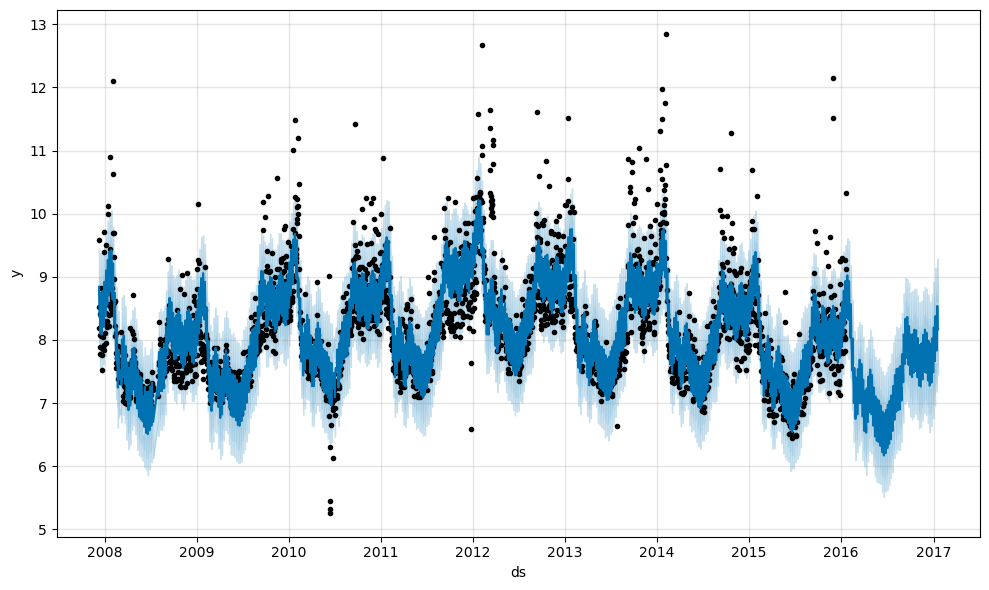

In [12]:
# Plot the forecast
fig1 = m.plot(forecast)

- __Plot forecast components:__
   - plot_components method visualizes different parts of the forecast; by default it shows: Trend, yearly seasonality, weekly seasonality. Includes holidays is specified.

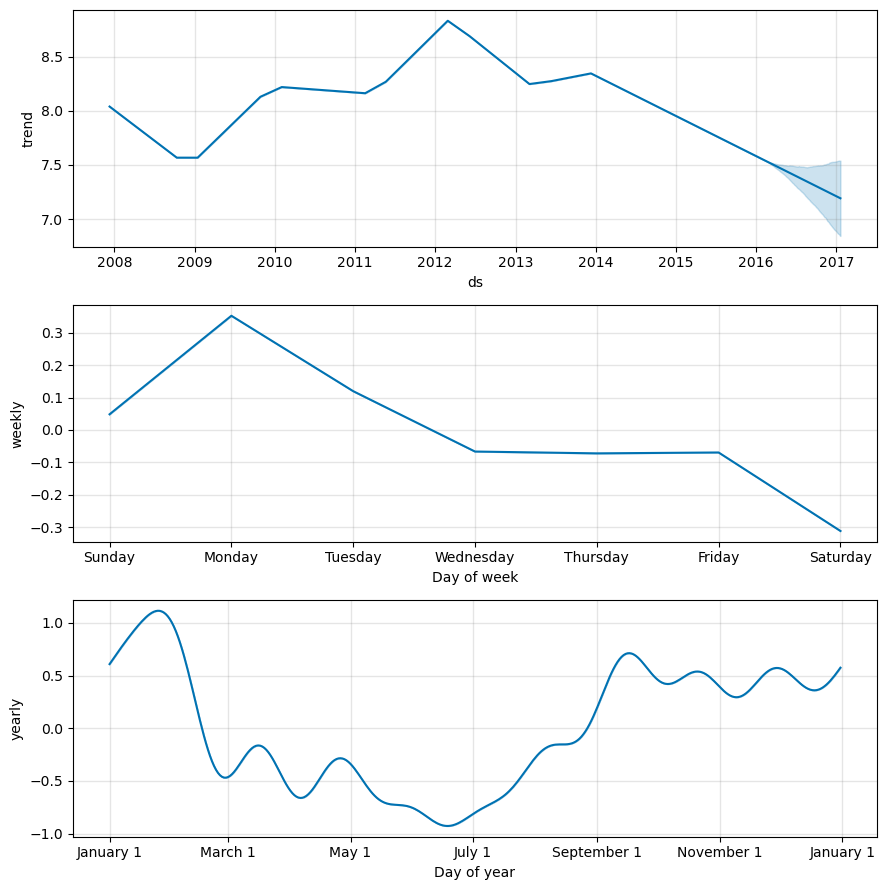

In [13]:
fig2 = m.plot_components(forecast)

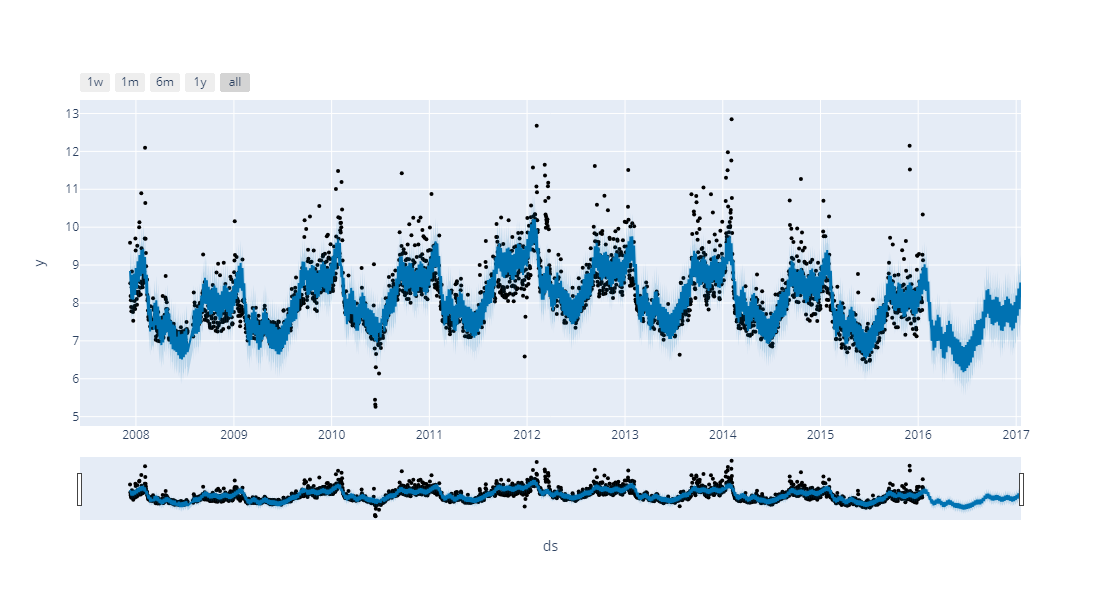

In [14]:
# Interactive figure of the forecast 
plot_plotly(m, forecast)

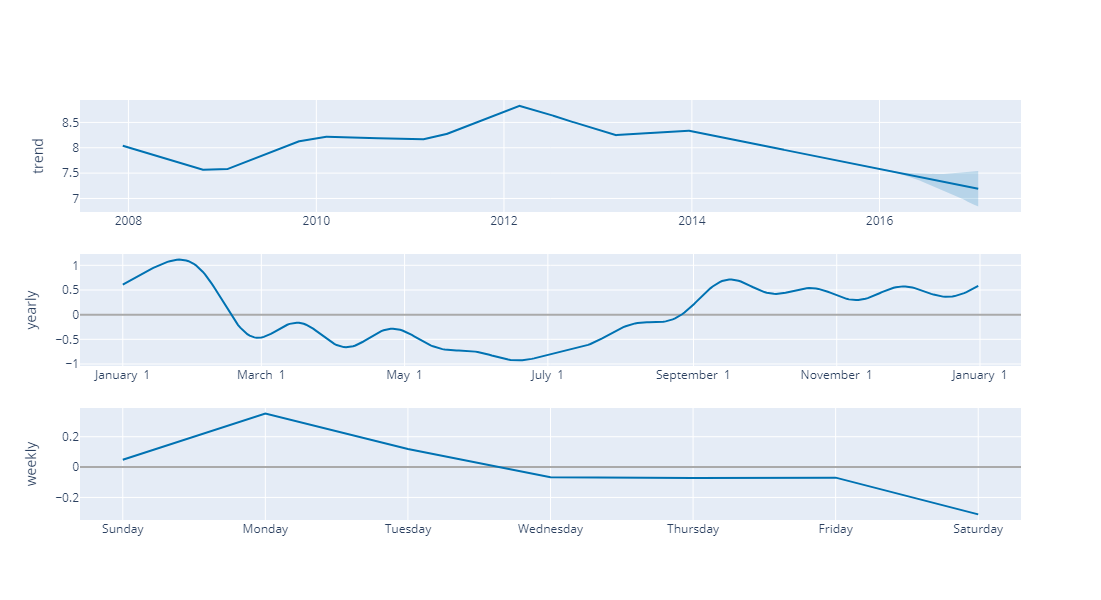

In [15]:
# Interactive figure of the forecast components
plot_components_plotly(m, forecast)

### Saturating Forecasts

In [16]:
Image(url="logistic-curve.png") 

#### Forecasting Growth with Prophet
__1. Linear Model (Default):__
   - <u>Description:</u> Prophet's default model is linear, meaning it assumes that growth or decline happens at a constant rate over time.
   - <u>Behavior:</u> Predicts steady, unbounded growth or decline, which may not be realistic in scenarios where there are natural limits to growth.
   - <u>Use Case:</u> Suitable for short-term forecasts or when there's no clear upper limit to growth.

__Carrying Capacity:__
   - <u>Definition:</u> The maximum achievable point in growth, such as the total market size or population size.
   - <u>Importance:</u> Recognizes that many real-world phenomena have a natural upper limit.
   - __Examples:__
     - <u>Market Size:</u> Only a certain number of people can buy a product.
     - <u>Population Size:</u> A region can support only a certain number of people.

__2. Logistic Growth Model:__
   - <u>Purpose:</u> To provide a more realistic forecast when there is an upper limit to growth.
   - <u>Behavior:</u> Growth starts off exponential, slows down as it approaches the carrying capacity, and eventually levels off.
   - <u>Formula:</u> Logistic growth is modeled by the formula:
   - <u> More info.:</u> https://en.wikipedia.org/wiki/Logistic_function

$$
y(t) = \frac{C}{1 + \exp(-k(t - t_0))}
$$

where:
- $y(t)$ is the predicted value at time $t$.
- $C$ is the carrying capacity (maximum achievable value).
- $k$ is the growth rate.
- $t_0$ is the midpoint (time at which the growth rate is maximal), $t$ value of midpoint.

In [32]:
# Load the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv')

In [33]:
df

ds         y
0     2008-01-30  5.976351
1     2008-01-16  6.049733
2     2008-01-17  6.011267
3     2008-01-14  5.953243
4     2008-01-15  5.910797
...          ...       ...
2858  2015-12-11  7.834788
2859  2015-12-12  7.360104
2860  2015-12-13  7.479864
2861  2015-12-18  7.765145
2862  2015-12-19  7.220374

[2863 rows x 2 columns]

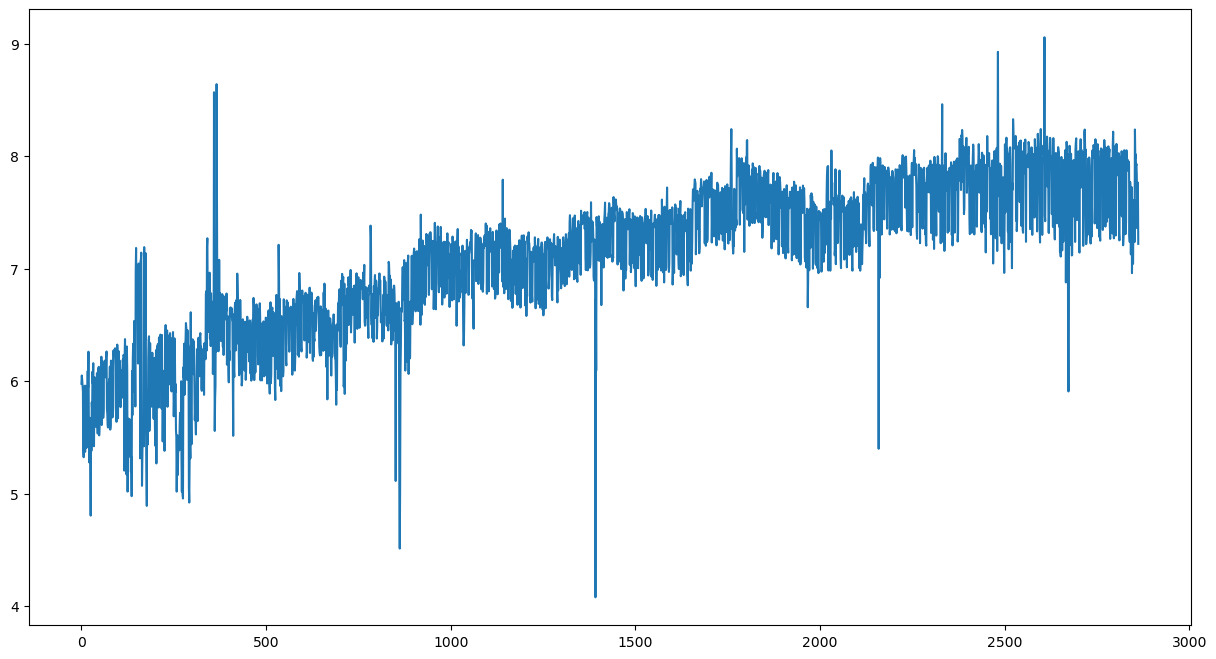

In [34]:
df.plot(figsize=(15, 8))
plt.legend().set_visible(False) 

__Carrying Capacity Column:__
- Add a column named cap to the DataFrame.
- This column represents the maximum achievable value (carrying capacity).
- Typically, the carrying capacity is determined using data or market expertise.
- Must be specified for every row in the DataFrame.
- If the market size is growing, 'cap' can be an increasing sequence.

In [35]:
# Set the carrying capacity to a specific value (e.g., 8.5)
df['cap'] = 8.5

In [36]:
df

ds         y  cap
0     2008-01-30  5.976351  8.5
1     2008-01-16  6.049733  8.5
2     2008-01-17  6.011267  8.5
3     2008-01-14  5.953243  8.5
4     2008-01-15  5.910797  8.5
...          ...       ...  ...
2858  2015-12-11  7.834788  8.5
2859  2015-12-12  7.360104  8.5
2860  2015-12-13  7.479864  8.5
2861  2015-12-18  7.765145  8.5
2862  2015-12-19  7.220374  8.5

[2863 rows x 3 columns]

__- Logistic Growth Model:__
 - Specify logistic growth when creating the Prophet object.
 - Fit the model with the DataFrame that includes the cap column.

In [37]:
# Specify logistic growth model
m = Prophet(growth='logistic')

# Fit the model
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Making Future Predictions with Logistic Growth
__Create Future DataFrame:__
- Use make_future_dataframe to generate future dates.
- Specify the number of periods (days) to forecast into the future (e.g., 1826 days for 5 years).
  
__Specify Future Capacity:__
- Add a cap column to the future DataFrame.
- Set the capacity to a constant value (e.g., 8.5).

In [38]:
# Create future dataframe with specified periods
future = m.make_future_dataframe(periods=1826)

# Specify constant capacity in the future
future['cap'] = 8.5

# Make predictions
fcst = m.predict(future)

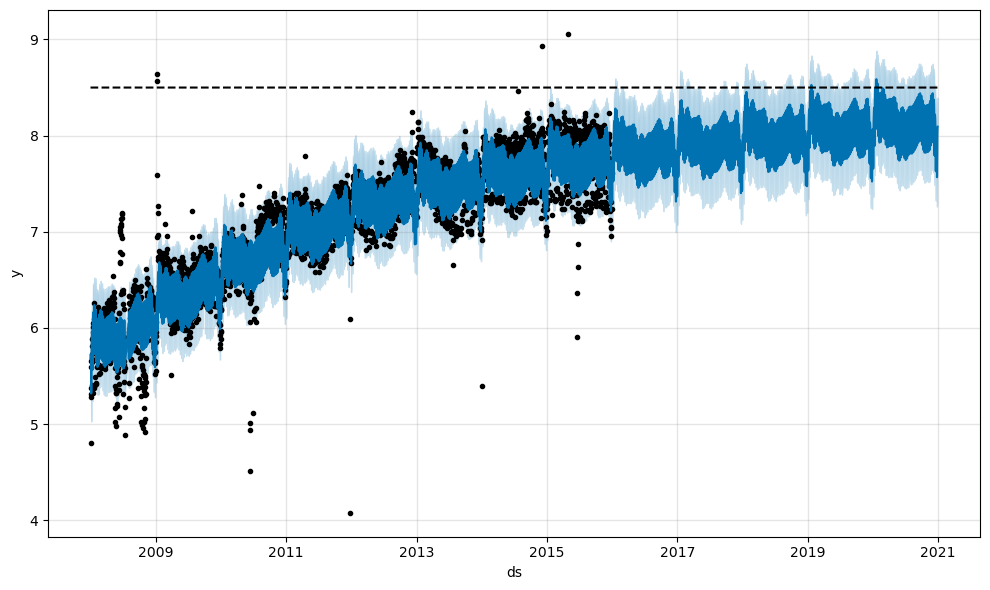

In [39]:
# Plot the forecast
fig = m.plot(fcst)

#### Saturating Minimum
The logistic growth model in Prophet can also handle a saturating minimum, which is specified using a floor column. This works similarly to the cap column for specifying the maximum value.

In [43]:
# Adjust y values and specify carrying capacity and floor
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5

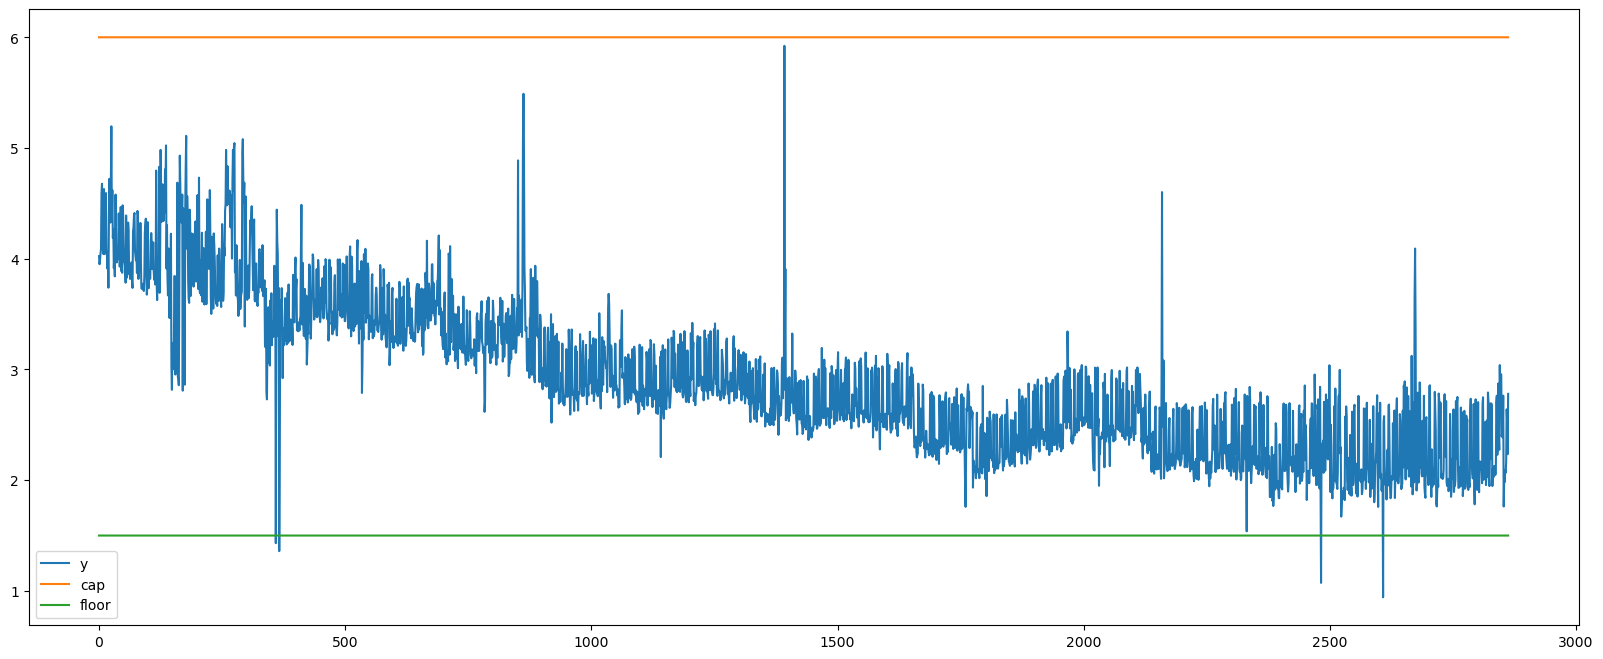

In [44]:
df.plot(figsize=(20, 8));

In [45]:
# Initialize the model with logistic growth
m = Prophet(growth='logistic')

# Fit the model
m.fit(df)

# Create future dataframe with specified periods
future = m.make_future_dataframe(periods=1826)

# Specify carrying capacity and floor in the future dataframe
future['cap'] = 6
future['floor'] = 1.5

# Make predictions
fcst = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


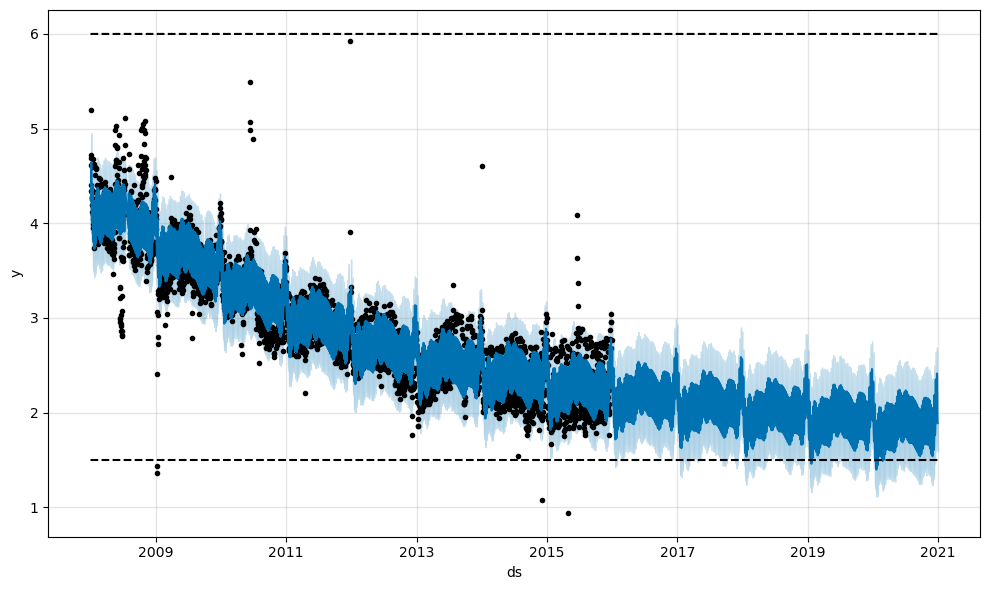

In [46]:
# Plot the forecast
fig1 = m.plot(fcst)

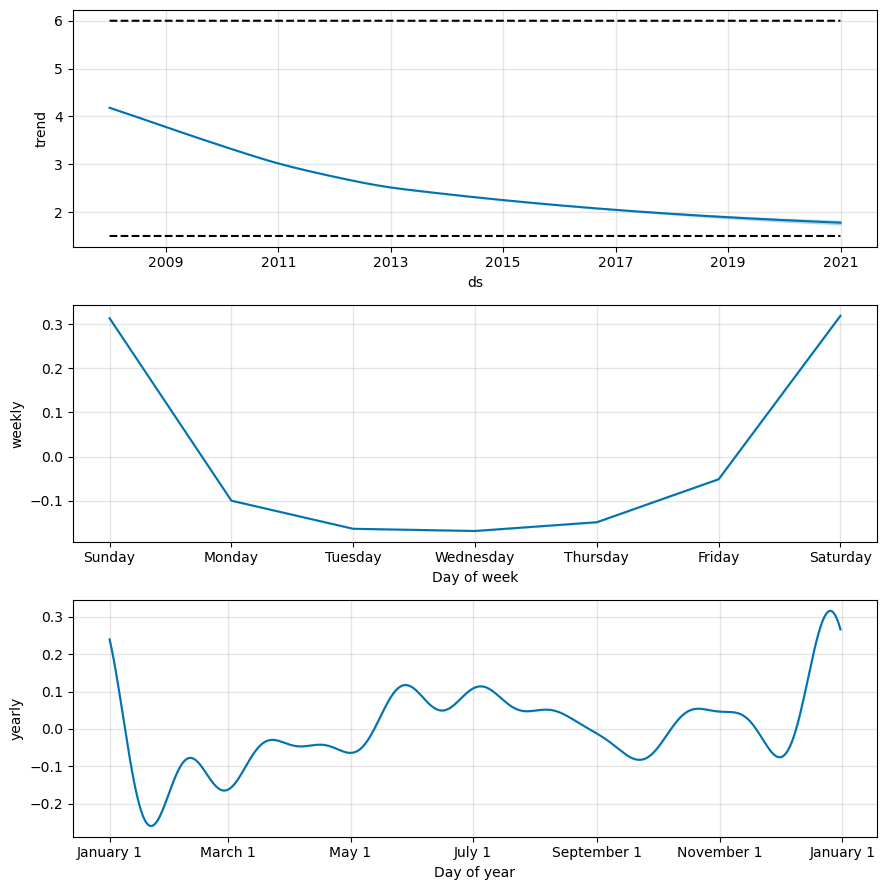

In [47]:
# Plot forecast components
fig2 = m.plot_components(fcst)

### Trend Changepoints in Prophet
Real time series often have abrupt changes in their trajectories. Prophet can automatically detect these changepoints and adapt the trend accordingly. If you need finer control, several input arguments are available.

__Process:__
- Prophet specifies many potential changepoints where the rate can change.
- It uses <u>a sparse prior (L1 regularization)</u> to limit the number of changepoints used.
- L1 Regularization acts like a filter. It picks out only the days where there is a strong enough change in your walking pattern and ignores minor fluctuations.

__Default Behavior:__
- Prophet specifies 25 potential changepoints uniformly placed in the first 80% of the time series.
- Most potential changepoints go unused due to the sparse prior.

In [48]:
# Load the time series data
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [49]:
# Instantiate Prophet: create a new Prophet object.
m = Prophet()
# Fit the model
m.fit(df)
# Making predictions
# periods: specifies the number of days into the future.
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


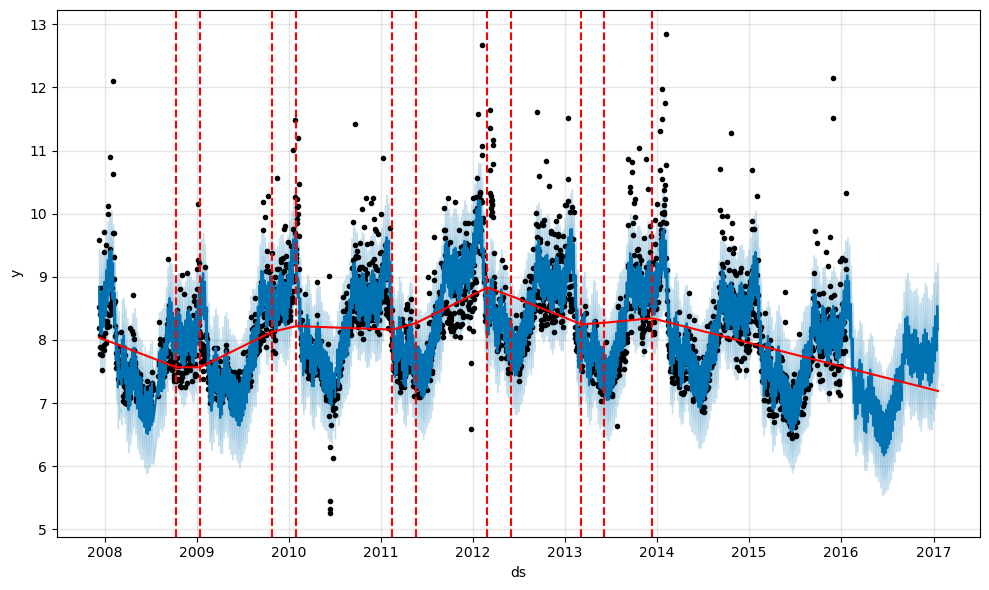

In [50]:
# Visualizing changepoints
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


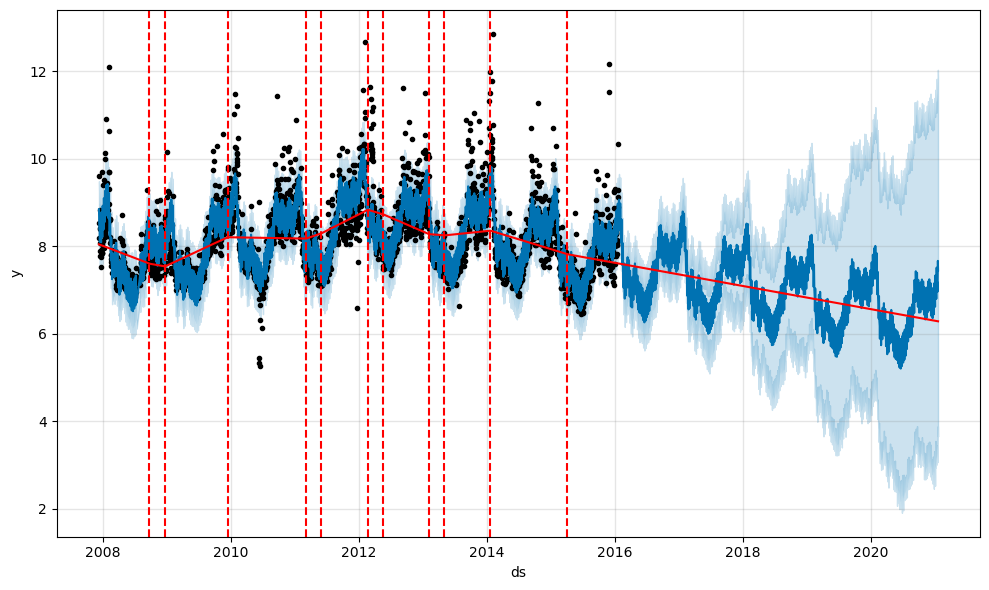

In [51]:
# Initialize the model with custom changepoint settings (30 change points and the first 90% of the time series).
m = Prophet(n_changepoints=30, changepoint_range=0.9)

# Fit the model
m.fit(df)

# Create future dataframe
future = m.make_future_dataframe(periods=1826)

# Make predictions
forecast = m.predict(future)

# Plot the forecast
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast);

### Adjusting Trend Flexibility
__Trend Flexibility:__
 - Overfit: Too much flexibility in trend changes.
 - Underfit: Not enough flexibility in trend changes.

__Adjusting Trend Flexibility:__
- Use changepoint_prior_scale to control the strength of the sparse prior.
 - Default value: 0.05.
 - Increasing the value makes the trend more flexible.
 - Decreasing the value makes the trend less flexible.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


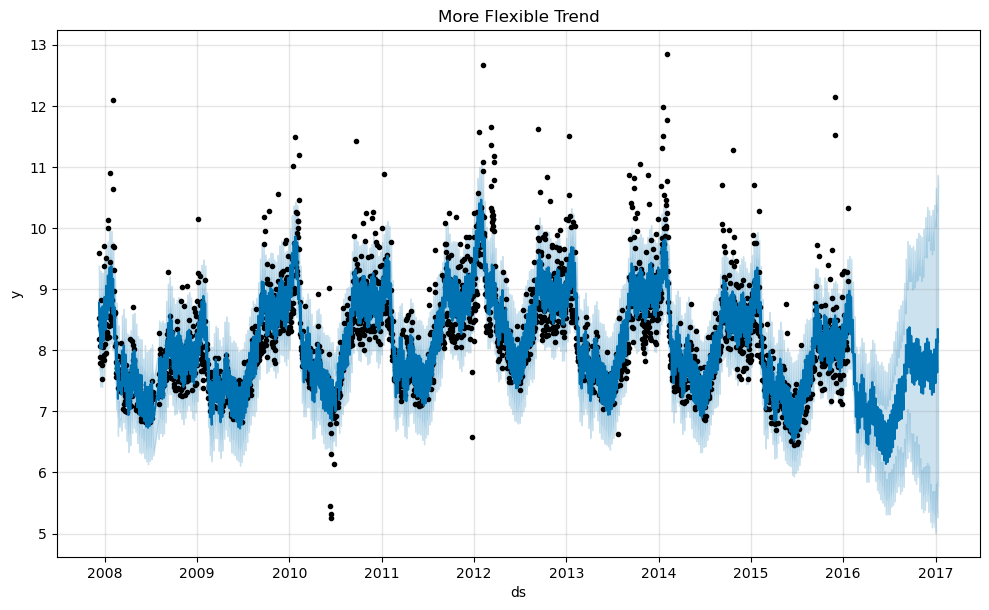

In [52]:
# Load the time series data
df = pd.read_csv('example_wp_log_peyton_manning.csv')
# Create future dataframe
future = m.make_future_dataframe(periods=356)
# More flexible trend
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
plt.title('More Flexible Trend');

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


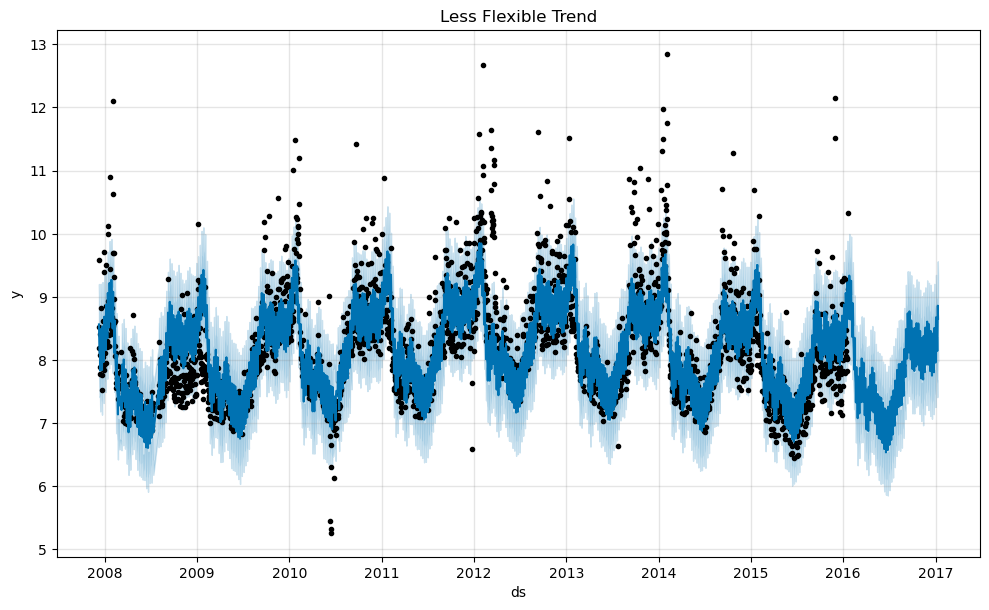

In [53]:
# Less flexible trend
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
plt.title('Less Flexible Trend');

#### Specifying the locations of the changepoints
__Manual Changepoint Specification:__
   - Instead of automatic detection, you can manually specify changepoints.
   - Use the 'changepoints' argument to provide specific dates.
   - Slope changes are allowed only at these specified points with sparse regularization.
     
__Benefits:__
   - Provides finer control over trend changes.
   - Useful when you have domain knowledge about specific dates likely to have changes.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


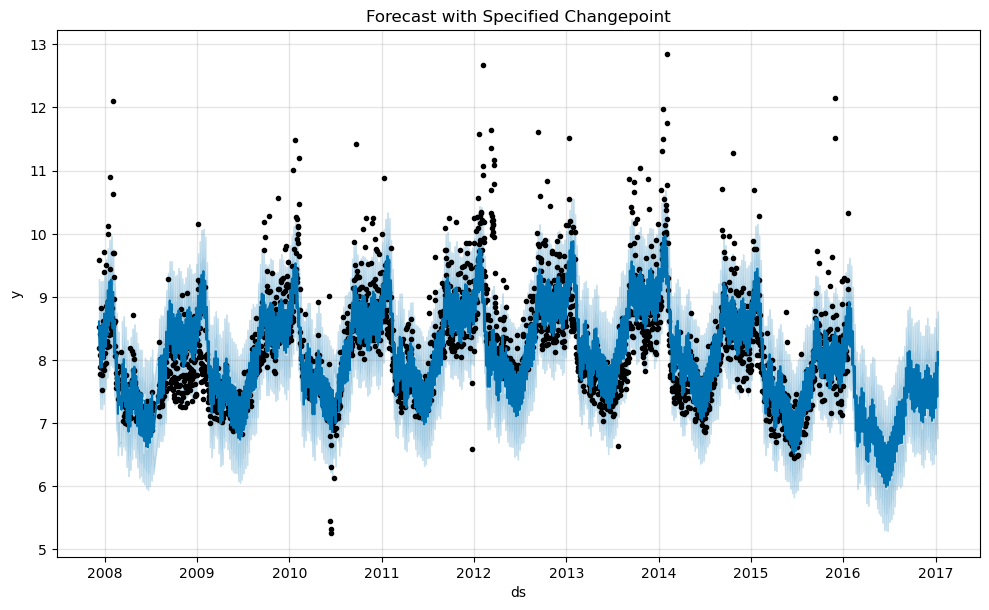

In [54]:
# Manual changepoint specification
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
plt.title('Forecast with Specified Changepoint');

### Seasonality, Holiday Effects, and Regressors
__Modeling Holidays and Special Events__

__Create a Dataframe:__
   - Columns: __holiday__ and __ds__
   - Each row represents one occurrence of a holiday
     
__Include All Occurrences:__
   - Past occurrences (matching historical data)
   - Future occurrences (up to the forecast period)
   - If holidays don't repeat in the future, Prophet uses past data only for modeling
     
__Extend Holiday Effect:__
   - Use lower_window and upper_window columns
     
__Example:__
   - Christmas Eve and Christmas: lower_window = -1, upper_window = 0
   - Black Friday and Thanksgiving: lower_window = 0, upper_window = 1
     
__Adjust Prior Scale:__
   - Add a prior_scale column to set the prior scale for each holiday individually

In [55]:
# Playoffs DataFrame
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

# Superbowls DataFrame
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

# Combine Holidays
holidays = pd.concat([playoffs, superbowls])

In [56]:
holidays

holiday         ds  lower_window  upper_window
0     playoff 2008-01-13             0             1
1     playoff 2009-01-03             0             1
2     playoff 2010-01-16             0             1
3     playoff 2010-01-24             0             1
4     playoff 2010-02-07             0             1
5     playoff 2011-01-08             0             1
6     playoff 2013-01-12             0             1
7     playoff 2014-01-12             0             1
8     playoff 2014-01-19             0             1
9     playoff 2014-02-02             0             1
10    playoff 2015-01-11             0             1
11    playoff 2016-01-17             0             1
12    playoff 2016-01-24             0             1
13    playoff 2016-02-07             0             1
0   superbowl 2010-02-07             0             1
1   superbowl 2014-02-02             0             1
2   superbowl 2016-02-07             0             1

In [57]:
# Load the time series data
df = pd.read_csv('example_wp_log_peyton_manning.csv')

# Create future dataframe
future = m.make_future_dataframe(periods=356)

# Initialize Prophet with holidays
m = Prophet(holidays=holidays)

# Fit the model and make predictions
forecast = m.fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'playoff',
       'playoff_lower', 'playoff_upper', 'superbowl', 'superbowl_lower',
       'superbowl_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [59]:
# Select the rows from the 'forecast' dataframe where the absolute sum of 'playoff' and 'superbowl' columns have non-zero values.
# Then, display the last 10 of these rows, showing only the 'ds', 'playoff', and 'superbowl' columns.
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]

ds   playoff  superbowl
2190 2014-02-02  1.227170   1.203772
2191 2014-02-03  1.913055   1.460153
2532 2015-01-11  1.227170   0.000000
2533 2015-01-12  1.913055   0.000000
2901 2016-01-17  1.227170   0.000000
2902 2016-01-18  1.913055   0.000000
2908 2016-01-24  1.227170   0.000000
2909 2016-01-25  1.913055   0.000000
2922 2016-02-07  1.227170   1.203772
2923 2016-02-08  1.913055   1.460153

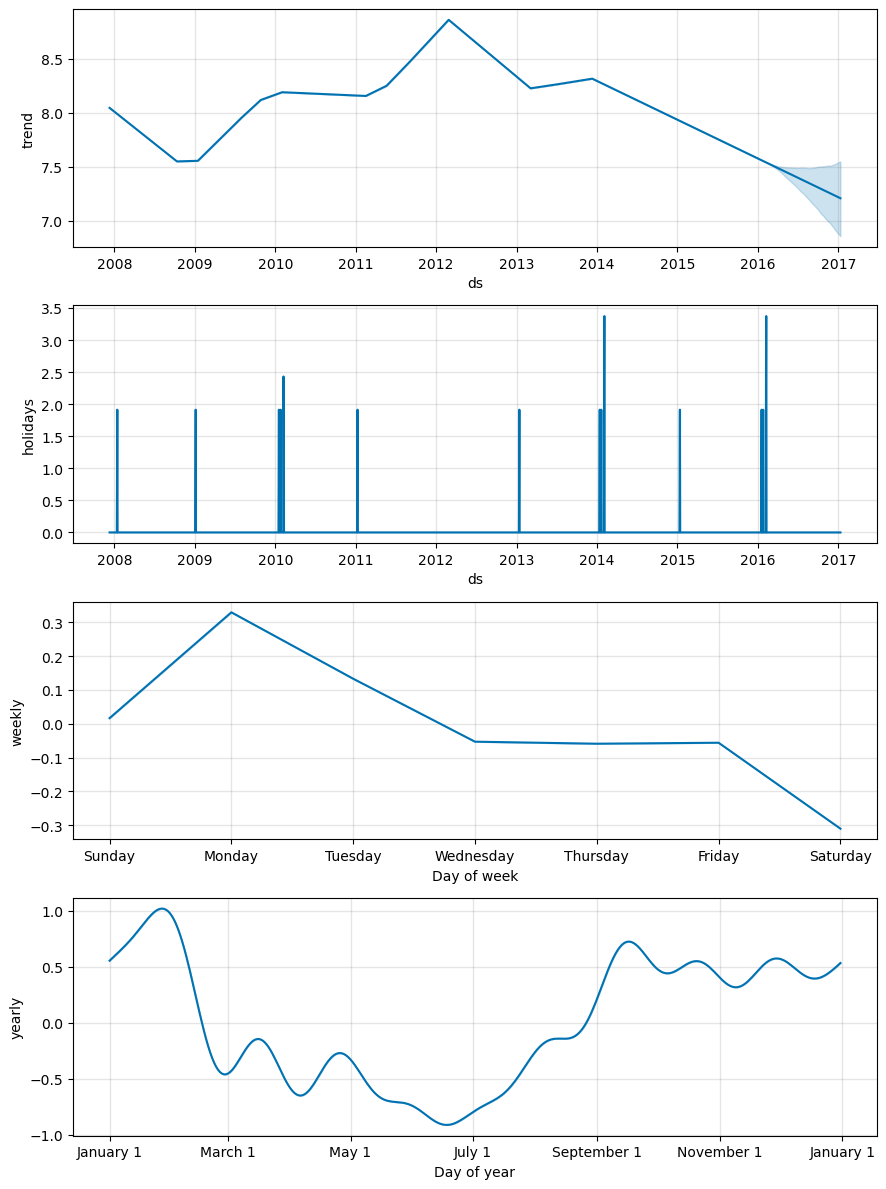

In [60]:
# Plot components
fig = m.plot_components(forecast)

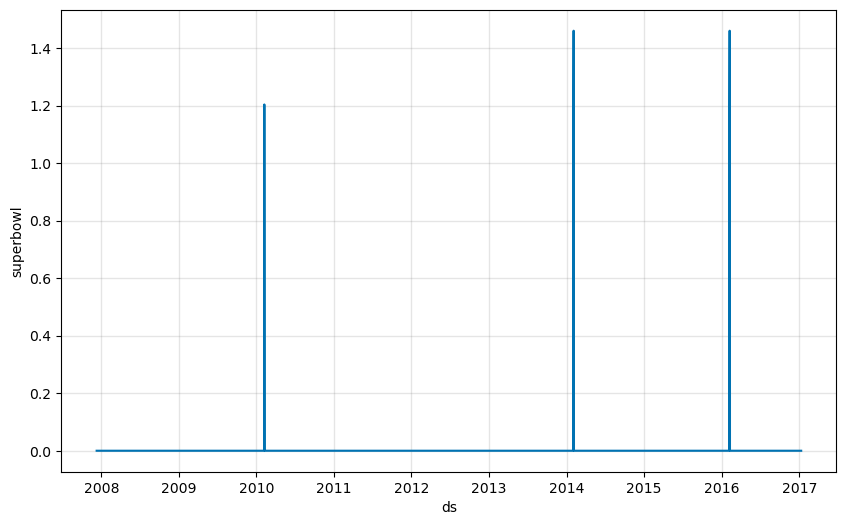

In [61]:
# Plot specific holiday effect
plot_forecast_component(m, forecast, 'superbowl')

#### Built-in Country Holidays
- Use add_country_holidays to include country-specific holidays.
 - Specify the country name to add major holidays.
 - Use train_holiday_names to see which holidays were included.
 - Country holidays are provided by the $holidays$ package in Python.
 - Available for any date range, with a warning for unsupported dates.
 - List of countries: https://github.com/vacanza/python-holidays/

In [62]:
# Initialize a Prophet model with custom holidays.
m = Prophet(holidays=holidays)

# Add predefined country holidays for the United States to the model.
m.add_country_holidays(country_name='US')

# Fit the model to the provided dataframe 'df' containing historical data.
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
# Check which holidays were included
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3      Martin Luther King Jr. Day
4           Washington's Birthday
5                    Memorial Day
6                Independence Day
7                       Labor Day
8                    Columbus Day
9                    Veterans Day
10                   Thanksgiving
11                  Christmas Day
12       Christmas Day (Observed)
13        Veterans Day (Observed)
14    Independence Day (Observed)
15      New Year's Day (Observed)
dtype: object

In [64]:
# Make predictions
forecast = m.predict(future)

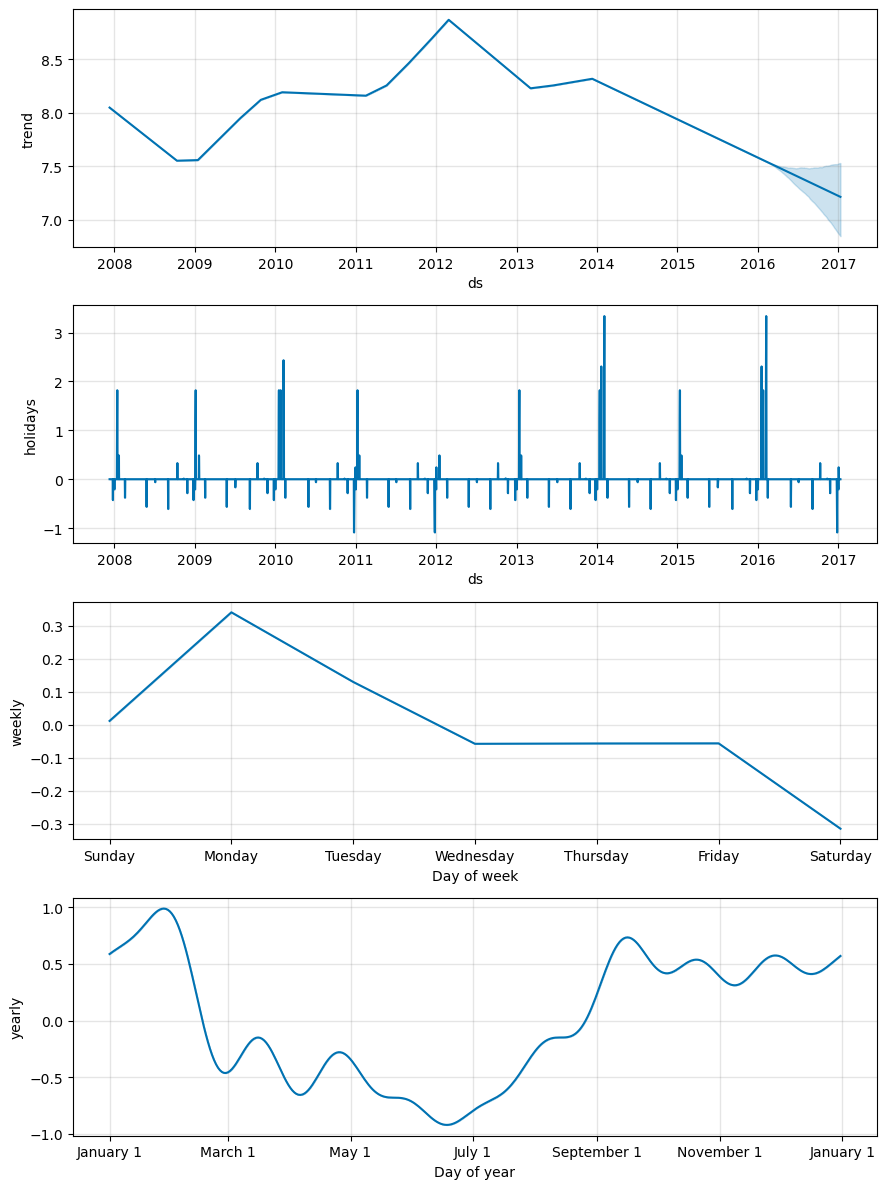

In [65]:
# Plot the forecast components including holiday effects
fig = m.plot_components(forecast)

#### Create Custom Holidays DataFrame:

In [66]:
# Generate a list of years from 2019 to 2028.
year_list = [2019 + i for i in range(10)]

# Create a dataframe of holidays for New South Wales (NSW), Australia, for the specified years.
nsw_holidays = make_holidays_df(year_list=year_list, country='AU', province='NSW')

# Display the first 10 rows of the generated holidays dataframe.
nsw_holidays.head(n=10)

ds                   holiday
0 2019-01-26             Australia Day
1 2019-01-28  Australia Day (Observed)
2 2019-04-25                 Anzac Day
3 2019-12-25             Christmas Day
4 2019-12-26                Boxing Day
5 2019-04-20           Easter Saturday
6 2019-04-21             Easter Sunday
7 2019-10-07                Labour Day
8 2019-06-10          Queen's Birthday
9 2019-08-05              Bank Holiday

In [67]:
# Generate a list of years from 2023 to 2026.
jp_holidays = make_holidays_df(year_list=2024, country='JP')
jp_holidays

ds holiday
0  2024-01-01      元日
1  2024-01-08    成人の日
2  2024-02-11  建国記念の日
3  2024-02-23   天皇誕生日
4  2024-03-20    春分の日
5  2024-04-29    昭和の日
6  2024-05-03   憲法記念日
7  2024-05-04   みどりの日
8  2024-05-05   こどもの日
9  2024-07-15     海の日
10 2024-08-11     山の日
11 2024-09-16    敬老の日
12 2024-09-22    秋分の日
13 2024-10-14  スポーツの日
14 2024-11-03    文化の日
15 2024-11-23  勤労感謝の日
16 2024-05-06    振替休日
17 2024-11-04    振替休日
18 2024-09-23    振替休日
19 2024-08-12    振替休日
20 2024-02-12    振替休日

#### Fourier Order for Seasonalities

__Using Partial Fourier Sums to Estimate Seasonalities:__
 - A Fourier sum is a way to break down a periodic signal (a repeating pattern) into a sum of simple sine and cosine waves.
 - i.e, the series of sine and cosine terms of the right frequencies approximate periodic series.

__Partial Fourier Sum:__
   - Instead of using an infinite number of terms, we use a finite (partial) sum to approximate the signal.
   - This sum includes a certain number of sine and cosine terms.
     
__Approximating a Periodic Signal:__
 - By combining these sine and cosine waves, we can closely mimic the original repeating pattern.
 - The more terms we include in the sum, the better we can capture the details of the pattern.

__Order of the Partial Sum:__
  - The number of terms we use is called the "order".
  - A higher order means more terms, allowing the model to capture more rapid changes in seasonality.
  - A lower order means fewer terms, capturing slower, smoother seasonal changes.

In [50]:
Image(url="fourier.png") 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


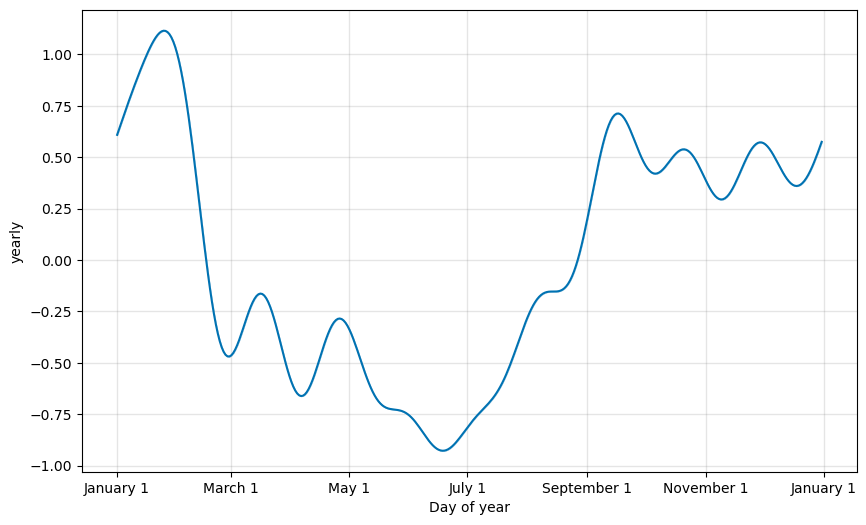

In [68]:
# The default Fourier order for yearly seasonality is 10, which produces this fit:
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


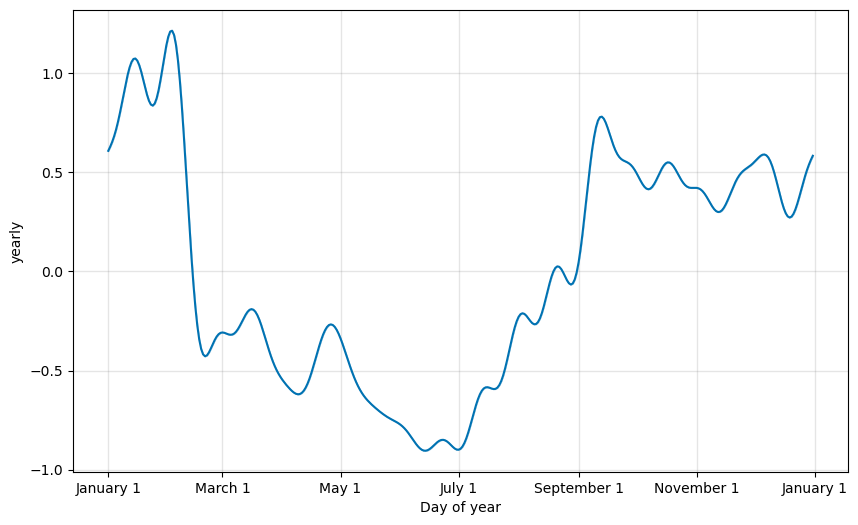

In [69]:
# The Fourier order can be specified for each built-in seasonality when instantiating the model
# Here it is increased to 20:
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

Increasing the number of Fourier terms allows the seasonality to fit faster changing cycles, but can also lead to __overfitting__: N Fourier terms corresponds to 2N variables used for modeling the cycle

#### Specifying Custom Seasonalities
__Default seasonalities:__
   - Weekly and Yearly: Fitted by default if the time series covers more than two cycles.
   - Daily: Fitted for sub-daily time series.

__Custom Seasonalities:__
   - Use add_seasonality to add custom seasonalities (e.g., monthly, quarterly, hourly).
   - Inputs: 'name', 'period' (in days), and 'fourier_order'.
   - Default values for Fourier order: 3 for weekly seasonality, 10 for yearly seasonality.

In [53]:
# Disable default weekly seasonality
m = Prophet(weekly_seasonality=False)
# Specify monthly seasonality with a period of 30.5 days and a Fourier order of 5
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [54]:
# Fit the model
m.fit(df)

# Make predictions
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


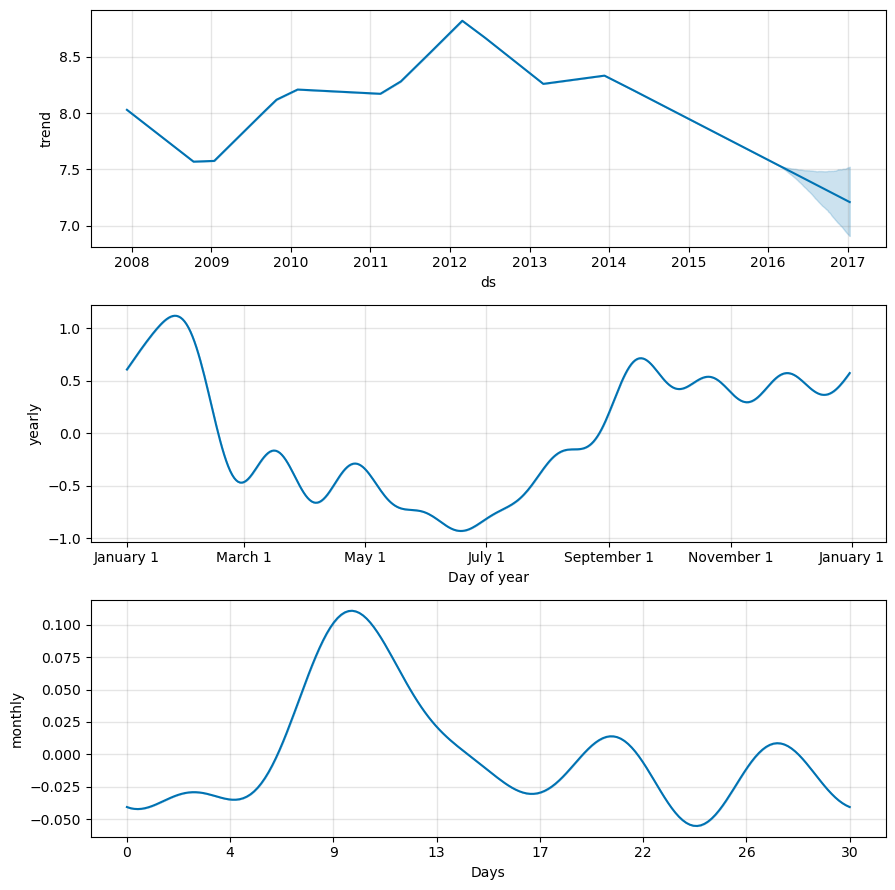

In [55]:
# Plot the forecast components including the new monthly seasonality
fig = m.plot_components(forecast)

#### Conditional Seasonalities
- In some instances the seasonality may depend on other factors, such as a weekly seasonal pattern that is different during the summer than it is during the rest of the year, or a daily seasonal pattern that is different on weekends vs. on weekdays.
- Allows modeling of separate seasonal patterns based on specific conditions.
- <u>Example:</u> Different weekly seasonality patterns during the on-season and off-season for NFL games.

__- Steps to Implement Conditional Seasonalities:__
1. Add boolean columns to indicate conditions (e.g., on_season, off_season).
2. Disable default weekly seasonality.
3. Add custom weekly seasonalities with conditions.
4. Ensure the future DataFrame includes the condition columns.

In [70]:
# Define a function to check if a given date is during the NFL season.
def is_nfl_season(ds):
    date = pd.to_datetime(ds)  # Convert the input to a datetime object.
    return (date.month > 8 or date.month < 2)  # Return True if the date is between September and January (NFL season).

In [71]:
# Apply the is_nfl_season function to the 'ds' column of the dataframe 'df' to create an 'on_season' column.
df['on_season'] = df['ds'].apply(is_nfl_season)

# Create an 'off_season' column by inverting the 'on_season' column.
df['off_season'] = ~df['ds'].apply(is_nfl_season)

In [72]:
# Initialize the Prophet model with no weekly seasonality.
m = Prophet(weekly_seasonality=False)

In [73]:
# Add a custom weekly seasonality component for the NFL on-season.
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')

# Add a custom weekly seasonality component for the NFL off-season.
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

In [74]:
# Apply the is_nfl_season function to the 'ds' column of the dataframe 'future' to create an 'on_season' column.
future['on_season'] = future['ds'].apply(is_nfl_season)

# Create an 'off_season' column by inverting the 'on_season' column in the 'future' dataframe.
future['off_season'] = ~future['ds'].apply(is_nfl_season)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


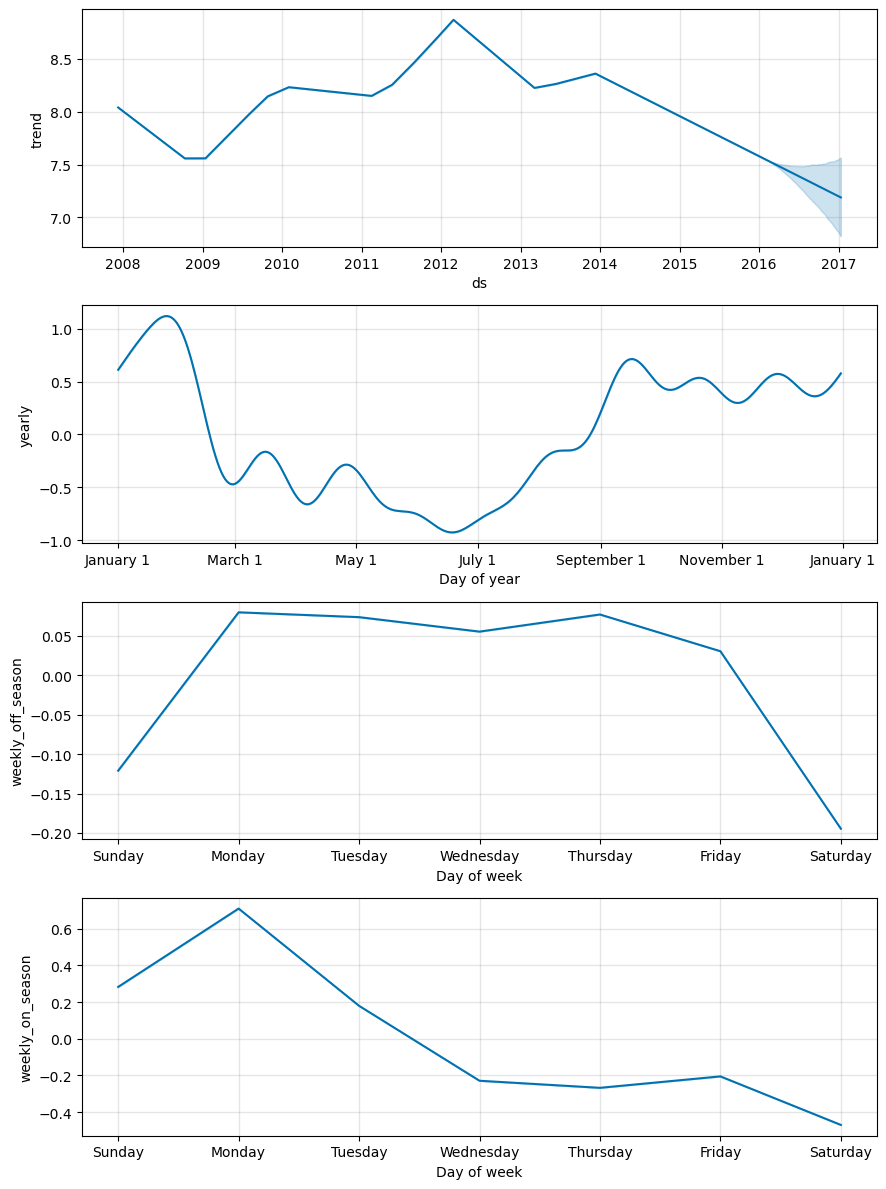

In [75]:
# Fit the Prophet model to the dataframe 'df' and make predictions for the 'future' dataframe.
forecast = m.fit(df).predict(future)

# Plot the components of the forecast, including the custom seasonalities.
fig = m.plot_components(forecast)

__Visualization analysis:__
   - During the on-season (games every Sunday), there are large increases on Sundays and Mondays.
   - These increases are absent during the off-season, indicating different seasonal patterns.

### Multiplicative Seasonality
- Additive Seasonality: The seasonal effect is added to the trend. It works well when the seasonality effect is constant over time.
- Multiplicative Seasonality: The seasonal effect grows with the trend. It’s useful when the impact of seasonality increases as the trend grows.

In [2]:
# Load the dataset
df = pd.read_csv('example_air_passengers.csv')

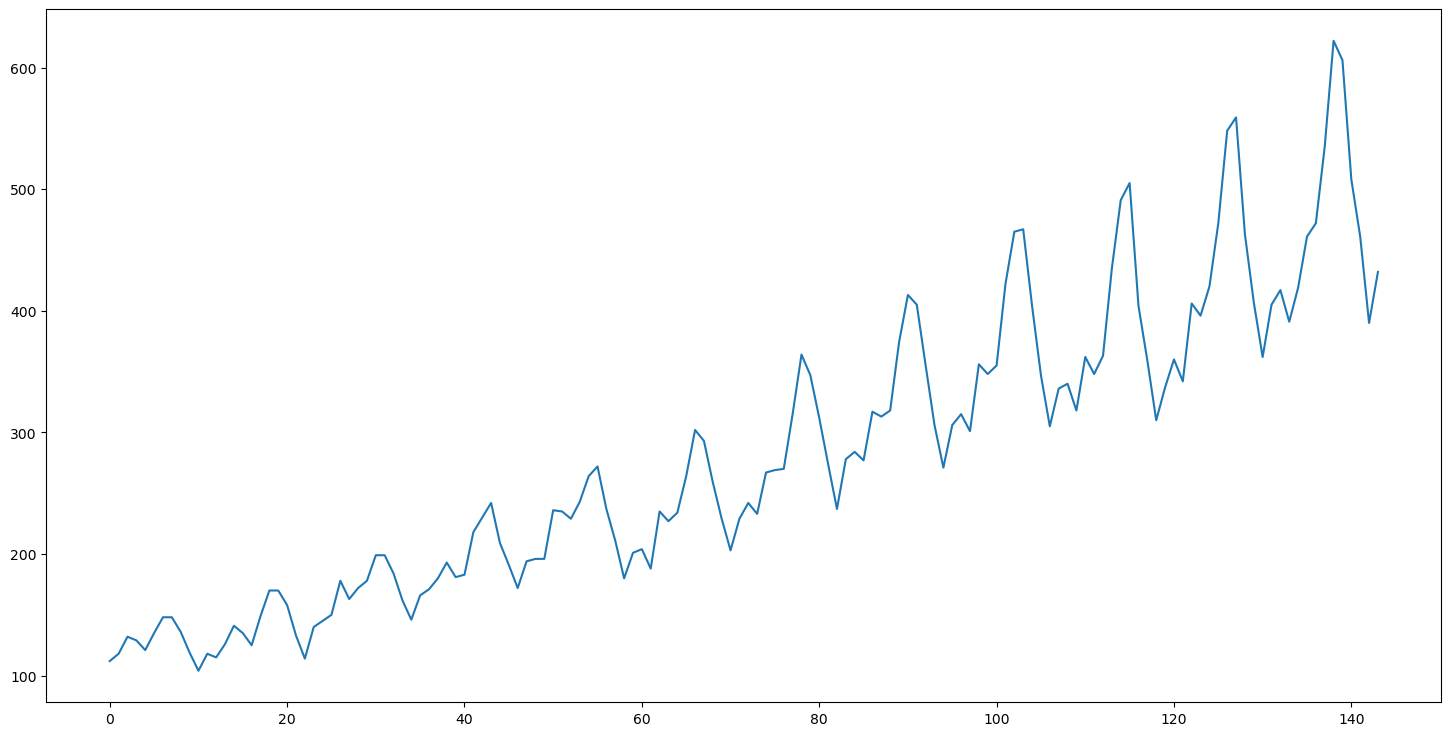

In [3]:
# In this case, the seasonality appears too large at the beginning and too small at the end of the series, 
# indicating that an additive model is not appropriate.
df.plot(figsize=(18, 9));
plt.legend().set_visible(False);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


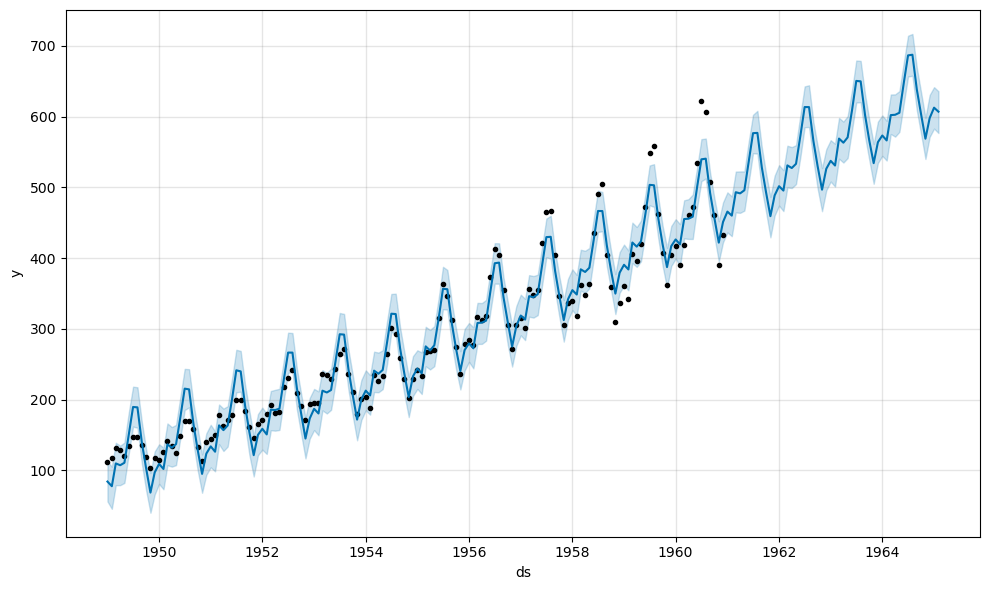

In [4]:
# Fit an additive seasonality model
m = Prophet()
m.fit(df)

# Predict using the additive model
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)

# Plot the forecast
fig = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


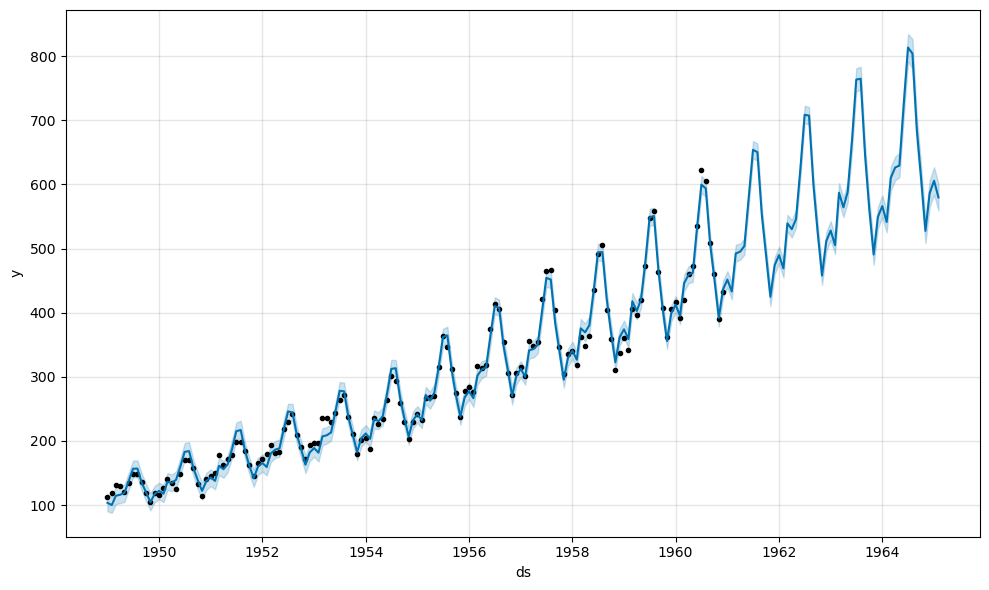

In [5]:
# The seasonality is now a percentage of the trend, fitting the data better as it grows with the trend.
# Fit a multiplicative seasonality model
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

# Predict using the multiplicative  model
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)

# Plot the forecast
fig = m.plot(forecast)

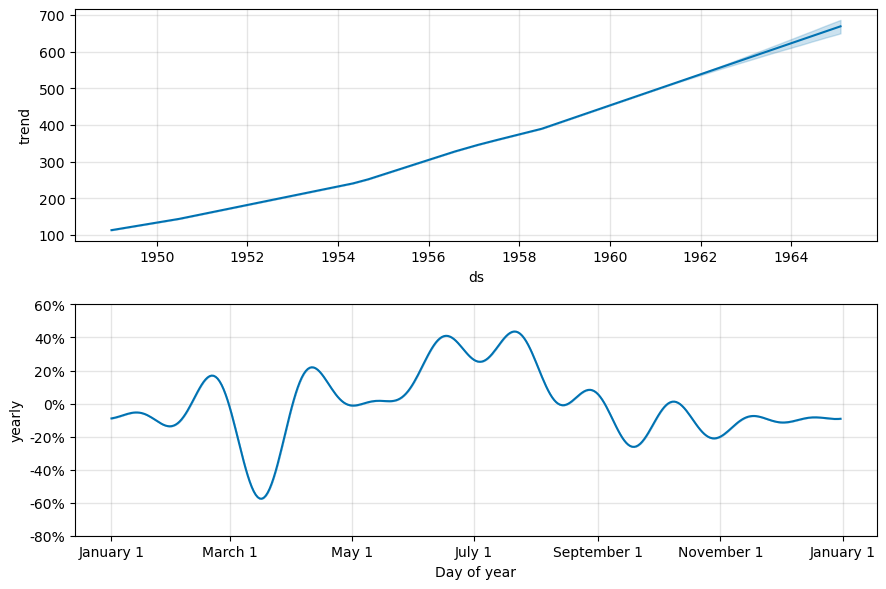

In [6]:
fig = m.plot_components(forecast)

__Seasonality Modes:__
- When you set seasonality_mode='multiplicative', all seasonal effects, including holidays, will be modeled as multiplicative by default.
- This means the seasonal effect will scale with the trend, rather than being a constant addition.

__Override Default Mode:__
- You can override the default mode for individual seasonalities or regressors by specifying mode='additive' or mode='multiplicative' when you add them.

In [7]:
# Initialize the Prophet model with multiplicative seasonality
m = Prophet(seasonality_mode='multiplicative')

# Add a quarterly seasonality with additive mode
m.add_seasonality(name='quarterly', period=91.25, fourier_order=8, mode='additive')

# Add an additive regressor
m.add_regressor('regressor', mode='additive')

In [ ]:
# Add a dummy regressor to the dataframe
# Here we're creating a simple example regressor that is a sequence of numbers
df['regressor'] = range(len(df))

# Fit the model to the dataframe 'df'
m.fit(df)

# Create a future dataframe with monthly steps, 50 months into the future
future = m.make_future_dataframe(50, freq='MS')

# Add the dummy regressor to the future dataframe as well
# For simplicity, we will extend the same sequence
future['regressor'] = range(len(future))

# Predict using the model
forecast = m.predict(future)

# Plot the forecast
fig = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Uncertainty Intervals
- Prophet returns uncertainty intervals for the forecast (yhat).
  
__Sources of Uncertainty:__
1. Trend changes.
2. Seasonality estimates.
3. Observation noise.

__1. Trend Uncertainty:__
   - <u>Main Source:</u> Future trend changes are unpredictable.
   - <u>Assumption:</u> Future trend changes will be similar in frequency and magnitude to past changes.
   - <u>Effect:</u> Higher flexibility (increasing changepoint_prior_scale) increases forecast uncertainty, indicating possible overfitting.
   - <u>Setting Interval Width:</u> Use interval_width parameter to adjust (default is 80%)
   - <u>Note:</u> These intervals assume future trend changes will mirror the past, which may not always be accurate.

In [ ]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

In [ ]:
# Plot the forecast
fig = m.plot(forecast)

__2. Uncertainty in Seasonality:__
- Prophet normally includes uncertainty in the trend and noise, but not in seasonality.
- To include uncertainty in seasonality, you need to do a more detailed analysis called Bayesian sampling.

In [ ]:
# Enable Bayesian Sampling: Set mcmc_samples to a number greater than 0 (e.g., 300)
m = Prophet(mcmc_samples=300)
forecast = m.fit(df).predict(future)

In [ ]:
fig = m.plot_components(forecast)

### Handling Outliers in Prophet
- Outliers can cause Prophet to fit trend changes to the unusual data, making the uncertainty intervals too wide.

In [ ]:
# Load dataset with outliers
df = pd.read_csv('example_wp_log_R_outliers1.csv')
df.plot(figsize=(18, 8));

In [ ]:
# Fit the model
m = Prophet()
m.fit(df)

# Create future dataframe and predict for the next 3 years
future = m.make_future_dataframe(periods=1096)  
forecast = m.predict(future)

In [ ]:
# Plot the forecast
fig = m.plot(forecast)

__Issue:__ The trend forecast looks reasonable, but the uncertainty intervals are too wide due to the outliers.

__Best Way to Handle Outliers:__
   - <u>Remove Outliers:</u> Prophet can handle missing data. Set the outlier values to NA (missing) in the historical data but keep the dates for future predictions.

In [ ]:
# Remove outliers by setting their values to None
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None

# Fit the model with cleaned data
model = Prophet().fit(df)

In [ ]:
# Predict and plot the forecast
fig = model.plot(model.predict(future))

__Result:__ The forecast is more accurate, with reasonable uncertainty intervals, as the outliers no longer skew the model.